In [1]:
import ml_battery.log
import local_models.local_models as local_models
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.cluster
from importlib import reload
from ml_battery.utils import cmap
import matplotlib as mpl
import os
import cv2
import logging
reload(local_models)
mpl.rcParams['figure.figsize'] = [8.0, 8.0]
BIG = 999999999999999999999999

In [2]:
imagedir = "/home/scott/windowed_gaussian_process_study/data/virat/VIRAT_S_000001"
images = sorted([os.path.join(imagedir,x) for x in os.listdir(imagedir)])
print(images[11479])

/home/scott/windowed_gaussian_process_study/data/virat/VIRAT_S_000001/frame11480.png


In [3]:
def read_image(name, scale):
    im = cv2.imread(name,0)
    return cv2.resize(im, tuple((np.array(im.shape[2::-1])/scale).astype(np.int64)), interpolation = cv2.INTER_CUBIC)

In [35]:
' '.join(images[frame_center-1-frame_width:frame_center-1+frame_width:subsample])

'/home/scott/windowed_gaussian_process_study/data/virat/VIRAT_S_000001/frame10680.png /home/scott/windowed_gaussian_process_study/data/virat/VIRAT_S_000001/frame10685.png /home/scott/windowed_gaussian_process_study/data/virat/VIRAT_S_000001/frame10690.png /home/scott/windowed_gaussian_process_study/data/virat/VIRAT_S_000001/frame10695.png /home/scott/windowed_gaussian_process_study/data/virat/VIRAT_S_000001/frame10700.png /home/scott/windowed_gaussian_process_study/data/virat/VIRAT_S_000001/frame10705.png /home/scott/windowed_gaussian_process_study/data/virat/VIRAT_S_000001/frame10710.png /home/scott/windowed_gaussian_process_study/data/virat/VIRAT_S_000001/frame10715.png /home/scott/windowed_gaussian_process_study/data/virat/VIRAT_S_000001/frame10720.png /home/scott/windowed_gaussian_process_study/data/virat/VIRAT_S_000001/frame10725.png /home/scott/windowed_gaussian_process_study/data/virat/VIRAT_S_000001/frame10730.png /home/scott/windowed_gaussian_process_study/data/virat/VIRAT_S_0

In [4]:
frame_center = 11480
frame_width = 800
scale = 4
subsample = 5
ims = list(map(lambda x: read_image(x,scale), images[frame_center-1-frame_width:frame_center-1+frame_width:subsample]))

In [5]:
ims = np.array(ims)

In [20]:
ims.shape

(320, 270, 480)

In [7]:
flatims = ims.reshape((-1,1))

In [8]:
index = np.moveaxis(np.indices(ims.shape),0,len(ims.shape))
flatindex = index.reshape((-1,len(ims.shape)))

In [9]:
print(flatims.shape, flatindex.shape)

(41472000, 1) (41472000, 3)


In [10]:
square_dist = sklearn.neighbors.dist_metrics.PyFuncDistance(lambda x,y: np.linalg.norm(x-y, ord=np.inf))

In [11]:
models = local_models.LocalModels(
    sklearn.linear_model.LinearRegression(),
)

In [12]:
models.fit(flatindex, flatims, ball_tree_kwargs = {
        "metric": "chebyshev"
    })

In [13]:
SUB = (slice(0,10),slice(BIG),slice(BIG))
subims, subindex = ims[SUB], index[SUB]
subims_flat = subims.reshape((-1,1))
subindex_flat = subindex.reshape((-1, len(subims.shape)))

In [ ]:
lm_params = models.transform(flatindex,k=4000,batch_size=1000,parallel=False)

In [ ]:
plt.scatter(lm_params[:,0], lm_params[:,1])
plt.show()

In [ ]:
import sklearn.preprocessing
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_lm_params = scaler.fit_transform(lm_params)

In [24]:
lm_imgs = scaled_lm_params[:,:3].reshape((320,270,480,3))

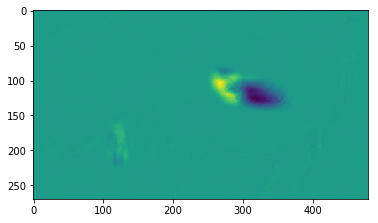

In [33]:
plt.imshow(lm_imgs[162,:,:,0])
plt.show()

In [26]:
which = "0005"

In [27]:
for i in range(320):
    cv2.imwrite("virat_{}_{}.png".format(which,i), ims[i])
    cv2.imwrite("virat_local_linear_{}_{}.png".format(which,i), lm_imgs[i]*256)
    cv2.imwrite("virat_local_linear_(time)_{}_{}.png".format(which,i), lm_imgs[i,:,:,0]*256)
    cv2.imwrite("virat_local_linear_(x)_{}_{}.png".format(which,i), lm_imgs[i,:,:,2]*256)
    cv2.imwrite("virat_local_linear_(y)_{}_{}.png".format(which,i), lm_imgs[i,:,:,1]*256)

In [ ]:
lm_imgs[0].min()

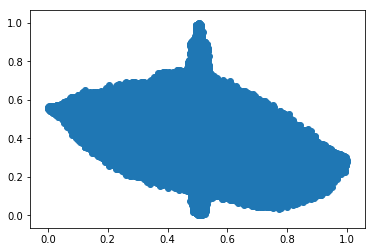

In [19]:
plt.scatter(scaled_lm_params[:,0], scaled_lm_params[:,3])
plt.show()

In [ ]:
scaled_lm_params[:,:3].reshape()

In [ ]:
g = np.mgrid[0:2:0.02, 0:10:0.1]
xx = np.vstack(map(np.ravel, g)).T

In [ ]:
pred = clf.predict(models.transform(xx,k=k))

In [ ]:
plt.scatter(xx[:,0], xx[:,1], c=cmap(pred), s=4)
#plt.scatter(x,y, c=cmap(clf.predict(lm_params)), linewidths=1, edgecolors='k')

plt.show()

In [ ]:
clf2 = sklearn.cluster.KMeans(2)

In [ ]:
clf2.fit(np.stack((x,y)).T)

In [ ]:
pred2 = clf2.predict(xx)

In [18]:
plt.scatter(xx[:,0], xx[:,1], c=cmap(pred2), s=6)
plt.scatter(x,y, c=cmap(clf2.predict(np.stack((x,y)).T)), linewidths=1, edgecolors=cmap(colors))

plt.show()

NameError: name 'xx' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib inline

In [ ]:
print(animation.writers.list())

In [ ]:
xdata, ydata = x, y
offsets = np.stack((xdata, ydata)).T
multioffsets = []
for i in range(100):
    offsets[:,1] += np.random.normal(0,0.05,offsets.shape[0])
    multioffsets.append(np.copy(offsets))

fig = plt.figure()
decision_surface = plt.scatter(xx[:,0], xx[:,1], c=cmap(pred), s=6, animated=True)
scat = plt.scatter(x,y, c=cmap(clf.predict(lm_params)), linewidths=1, edgecolors='k', animated=True)

def init():
    return scat, decision_surface

def update(frame):
    offsets = multioffsets[frame]
    models.fit(offsets[:,:1], offsets[:,1:], offsets)
    pred = clf.predict(models.transform(xx,k=k))
    decision_surface.set_color(cmap(pred))
    scat.set_offsets(np.copy(multioffsets[frame]))
    return scat, decision_surface


ani = FuncAnimation(fig, update, frames=range(100),
                    init_func=init, blit=True)

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='CScott!'), bitrate=1800)
ani.save('ani_k10_double.mp4', writer=writer)

HTML(ani.to_html5_video())
#offsets[:,1] += np.random.normal(0,0.05,offsets.shape[0])
#scat.set_offsets(offsets)
#scat